# Preliminary experiment
Here, we demonstrate the adaptive inverse calculation which calculate the adaptive error
signal vectors: (x; y; z) in the gravitational space and (roll; pitch; yaw) in the orientation
space.
Since the calculation of one space is done independently of the another, for the demonstration
we set a model constructed of two sub-models - one for the gravitational
space and one for the orientation space. Each sub-model contains three compute unites,
since each dimension can be calculated independently. Each unit has 1. a node of input
which represent the current state of the system, 2. a target node which represent the required
target state, 3. an ensemble that represent the neuronal result, 4. a direct ensemble
which is a reference for the expected result and 5. an ensemble which represent the adaptive
error compensation signal.

In [1]:
# %%
# package installation
from IPython import get_ipython
get_ipython().system('pip install nengo')
get_ipython().system('pip install nengo-gui')
get_ipython().system('pip install numpy')
get_ipython().system('pip install matplotlib')
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import nengo
import numpy as np
from nengo.processes import Piecewise

## Create the nengo model

In [2]:
model = nengo.Network()

min_r = -1
max_r = 1

def scale_down(x,min_r, max_r):
    return ((max_r-min_r) * (x - min_r) / (max_r - min_r)) + min_r
def scale_up_deg(x):
    return ((max_r-min_r) * (x + 1) / 2) +  min_r
    
with model:
    
    ############################################
    #              x, y, z axes                #
    ############################################

    def calculate_xyz(x):
        return ((x[1])) - ((x[0]))

    # create input and output for each dimemsion   
    target_x = nengo.Node(Piecewise({0: scale_down(0,min_r,max_r)}))
    stim_x  = nengo.Node(Piecewise({0: scale_down(0,min_r,max_r), 1: scale_down(1,min_r,max_r), 2: scale_down(-1,min_r,max_r), 3: scale_down(0,min_r,max_r)}))
    target_y = nengo.Node(Piecewise({0: scale_down(0,min_r,max_r)}))
    stim_y = nengo.Node(Piecewise({0: scale_down(0,min_r,max_r), 1: scale_down(-1,min_r,max_r), 2: scale_down(0,min_r,max_r), 3: scale_down(0,min_r,max_r)}))
    target_z = nengo.Node(Piecewise({0: scale_down(0,min_r,max_r), 3: scale_down(1,min_r,max_r)}))
    stim_z = nengo.Node(Piecewise({0: scale_down(0,min_r,max_r), 1: scale_down(0,min_r,max_r), 2: scale_down(1,min_r,max_r), 3: scale_down(-1,min_r,max_r)}))
    
    # create model for x
    integrator_x = nengo.Ensemble(
        n_neurons=3000,
        dimensions=2,
        radius=np.sqrt(2),
        seed = 0
    )
    integrator_x_direct = nengo.Ensemble(
        n_neurons=1,
        dimensions=2,
        neuron_type=nengo.Direct(),
    )
    res_x = nengo.Ensemble(
        n_neurons=600,
        neuron_type=nengo.Direct(),
        dimensions=2,
        radius=2,
        seed = 0
    )
    for ii, ens_x in enumerate([integrator_x, integrator_x_direct]) :
        nengo.Connection(stim_x, ens_x[0])
        nengo.Connection(target_x, ens_x[1])
        
        nengo.Connection(ens_x, res_x[ii],  function=calculate_xyz)

    # create model for y
    integrator_y = nengo.Ensemble(
        n_neurons=3000,
        dimensions=2,
        radius=np.sqrt(2),
        seed = 0
    )
    integrator_y_direct = nengo.Ensemble(
        n_neurons=1,
        dimensions=2,
        neuron_type=nengo.Direct(),
    )
    res_y = nengo.Ensemble(
        n_neurons=600,
        neuron_type=nengo.Direct(),
        dimensions=2,
        radius=2,
        seed = 0
    )
    for ii, ens_y in enumerate([integrator_y, integrator_y_direct]) :
        nengo.Connection(stim_y, ens_y[0])
        nengo.Connection(target_y, ens_y[1])
        
        nengo.Connection(ens_y, res_y[ii],  function=calculate_xyz)
    
    # create model for z
    integrator_z = nengo.Ensemble(
        n_neurons=3000,
        dimensions=2,
        radius=np.sqrt(2),
        seed = 0
    )
    integrator_z_direct = nengo.Ensemble(
        n_neurons=1,
        dimensions=2,
        neuron_type=nengo.Direct(),
    )
    res_z = nengo.Ensemble(
        n_neurons=600,
        neuron_type=nengo.Direct(),
        dimensions=2,
        radius=2,
        seed = 0
    )
    for ii, ens_z in enumerate([integrator_z, integrator_z_direct]) :
        nengo.Connection(stim_z, ens_z[0])
        nengo.Connection(target_z, ens_z[1])
        
        nengo.Connection(ens_z, res_z[ii],  function=calculate_xyz)
    
    # connect probs to each component
    stim_x_probe = nengo.Probe(stim_x)
    target_x_probe = nengo.Probe(target_x)
    integrator_x_prob = nengo.Probe(integrator_x)
    integrator_x_direct_prob = nengo.Probe(integrator_x_direct)
    res_x_prob = nengo.Probe(res_x[0])

    stim_y_probe = nengo.Probe(stim_y)
    target_y_probe = nengo.Probe(target_y)
    integrator_y_prob = nengo.Probe(integrator_y)
    integrator_y_direct_prob = nengo.Probe(integrator_y_direct)
    res_y_prob = nengo.Probe(res_y[0])

    stim_z_probe = nengo.Probe(stim_z)
    target_z_probe = nengo.Probe(target_z)
    integrator_z_prob = nengo.Probe(integrator_z)
    integrator_z_direct_prob = nengo.Probe(integrator_z_direct)
    res_z_prob = nengo.Probe(res_z[0])

    ############################################
    #           roll pitch yaw axes            #
    ############################################

    def s_down(x):
        return (((x - np.pi) / (2*np.pi))) +0.5
    def s_up(x):
        return x * np.pi + np.pi
    def calculate_angle(x):
        return ((x[1])) - ((x[0])) #%(2*np.pi)
        
    min_r = -2*np.pi
    max_r = 2*np.pi
    
    # create input and output for each dimemsion
    target_roll = nengo.Node(Piecewise({0: s_down(0)}))
    stim_roll = nengo.Node(Piecewise({0: s_down(0), 1: s_down(np.pi), 2: s_down(2*np.pi), 3: s_down(0)}))
    target_pitch = nengo.Node(Piecewise({0: s_down(0)}))
    stim_pitch = nengo.Node(Piecewise({0: s_down(0), 1: s_down(-np.pi), 2: s_down(0), 3: s_down(0)}))
    target_yaw = nengo.Node(Piecewise({0: s_down(0), 3: s_down(2*np.pi)}))
    stim_yaw = nengo.Node(Piecewise({0: s_down(0), 1: s_down(0), 2: s_down(-2*np.pi), 3: s_down(-2*np.pi)}))
    
    # create model for roll
    integrator_roll = nengo.Ensemble(
        n_neurons=3000,
        dimensions=2,
        radius=np.sqrt(2),
        seed = 0
    )
    integrator_roll_direct = nengo.Ensemble(
        n_neurons=1,
        dimensions=2,
        neuron_type=nengo.Direct(),
    )
    res_roll = nengo.Ensemble(
        n_neurons=600,
        neuron_type=nengo.Direct(),
        dimensions=2,
        radius=2,
        seed = 0
    )
    for ii, ens_roll in enumerate([integrator_roll, integrator_roll_direct]) :
        nengo.Connection(stim_roll, ens_roll[0])
        nengo.Connection(target_roll, ens_roll[1])
        
        nengo.Connection(ens_roll, res_roll[ii],  function=calculate_angle)
    
    # create model for pitch
    integrator_pitch = nengo.Ensemble(
        n_neurons=3000,
        dimensions=2,
        radius=np.sqrt(2),
        seed = 0
    )
    integrator_pitch_direct = nengo.Ensemble(
        n_neurons=1,
        dimensions=2,
        neuron_type=nengo.Direct(),
    )
    res_pitch = nengo.Ensemble(
        n_neurons=600,
        neuron_type=nengo.Direct(),
        dimensions=2,
        radius=2,
        seed = 0
    )
    for ii, ens_pitch in enumerate([integrator_pitch, integrator_pitch_direct]) :
        nengo.Connection(stim_pitch, ens_pitch[0])
        nengo.Connection(target_pitch, ens_pitch[1])
        
        nengo.Connection(ens_pitch, res_pitch[ii],  function=calculate_angle)
    
    # create model for yaw
    integrator_yaw = nengo.Ensemble(
        n_neurons=3000,
        dimensions=2,
        radius=np.sqrt(2),
        seed = 0
    )
    integrator_yaw_direct = nengo.Ensemble(
        n_neurons=1,
        dimensions=2,
        neuron_type=nengo.Direct(),
    )
    res_yaw = nengo.Ensemble(
        n_neurons=600,
        neuron_type=nengo.Direct(),
        dimensions=2,
        radius=2,
        seed = 0
    )
    for ii, ens_yaw in enumerate([integrator_yaw, integrator_yaw_direct]) :
        nengo.Connection(stim_yaw, ens_yaw[0])
        nengo.Connection(target_yaw, ens_yaw[1])
        
        nengo.Connection(ens_yaw, res_yaw[ii],  function=calculate_angle)
    
    # connect probs to each component
    stim_roll_probe = nengo.Probe(stim_roll)
    target_roll_probe = nengo.Probe(target_roll)
    integrator_roll_prob = nengo.Probe(integrator_roll)
    integrator_roll_direct_prob = nengo.Probe(integrator_roll_direct)
    res_roll_prob = nengo.Probe(res_roll[0])

    stim_pitch_probe = nengo.Probe(stim_pitch)
    target_pitch_probe = nengo.Probe(target_pitch)
    integrator_pitch_prob = nengo.Probe(integrator_pitch)
    integrator_pitch_direct_prob = nengo.Probe(integrator_pitch_direct)
    res_pitch_prob = nengo.Probe(res_pitch[0])

    stim_yaw_probe = nengo.Probe(stim_yaw)
    target_yaw_probe = nengo.Probe(target_yaw)
    integrator_yaw_prob = nengo.Probe(integrator_yaw)
    integrator_yaw_direct_prob = nengo.Probe(integrator_yaw_direct)
    res_yaw_prob = nengo.Probe(res_yaw[0])

## Run the simulation for 4 seconds

In [3]:
    # run the simulation (applies to both setups)
    with nengo.Simulator(model) as sim:
    # Run it for 4 seconds
        sim.run(4)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

## Plot the results

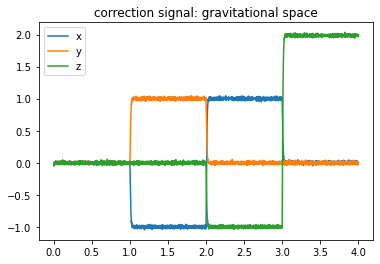

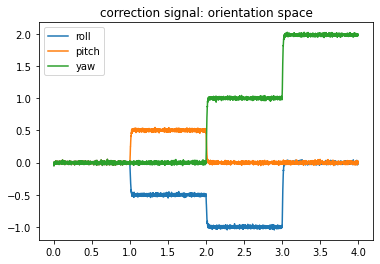

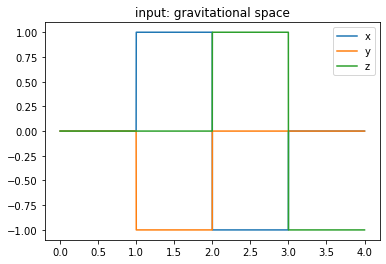

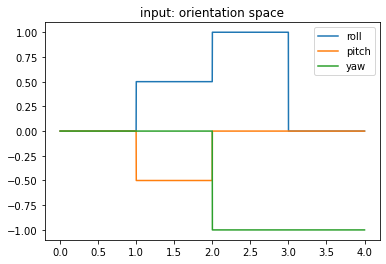

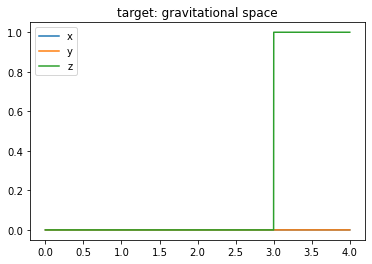

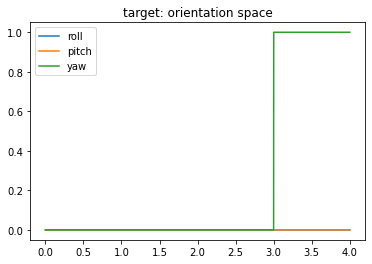

In [4]:
    # Plot the results
    # correction signal: x,y,z
    plt.figure()
    plt.title(label= 'correction signal: gravitational space')
    plt.plot(sim.trange(), sim.data[res_x_prob], label='x')
    plt.plot(sim.trange(), sim.data[res_y_prob], label='y')
    plt.plot(sim.trange(), sim.data[res_z_prob], label='z')
    plt.legend(loc="best");
    plt.show()

    # correction signal: roll,pitch,yaw
    plt.figure()
    plt.title(label= 'correction signal: orientation space')
    plt.plot(sim.trange(), sim.data[res_roll_prob], label='roll')
    plt.plot(sim.trange(), sim.data[res_pitch_prob], label='pitch')
    plt.plot(sim.trange(), sim.data[res_yaw_prob], label='yaw')
    plt.legend(loc="best");
    plt.show()
    
    # input signal: x,y,z
    plt.figure()
    plt.title(label= 'input: gravitational space')
    plt.plot(sim.trange(), sim.data[stim_x_probe], label='x')
    plt.plot(sim.trange(), sim.data[stim_y_probe], label='y')
    plt.plot(sim.trange(), sim.data[stim_z_probe], label='z')
    plt.legend(loc="best");
    plt.show()

    # input signal: roll,pitch,yaw
    plt.figure()
    plt.title(label= 'input: orientation space')
    plt.plot(sim.trange(), sim.data[stim_roll_probe], label='roll')
    plt.plot(sim.trange(), sim.data[stim_pitch_probe], label='pitch')
    plt.plot(sim.trange(), sim.data[stim_yaw_probe], label='yaw')
    plt.legend(loc="best");
    plt.show()

    # target state: x,y,z
    plt.figure()
    plt.title(label= 'target: gravitational space')
    plt.plot(sim.trange(), sim.data[target_x_probe], label='x')
    plt.plot(sim.trange(), sim.data[target_y_probe], label='y')
    plt.plot(sim.trange(), sim.data[target_z_probe], label='z')
    plt.legend(loc="best");
    plt.show()

    # target state: roll,pitch,yaw
    plt.figure()
    plt.title(label= 'target: orientation space')
    plt.plot(sim.trange(), sim.data[target_roll_probe], label='roll')
    plt.plot(sim.trange(), sim.data[target_pitch_probe], label='pitch')
    plt.plot(sim.trange(), sim.data[target_yaw_probe], label='yaw')
    plt.legend(loc="best");
    plt.show()